# Project funding patterns over time

In [4]:
suppressMessages(library(tidyverse))
suppressMessages(library(lubridate))

my_db <- src_postgres("donorschoose")
projects_tbl <- tbl(my_db, "projects")

In [3]:
overall_rates <- projects_tbl %>%
  filter(date_posted < "2016-01-01")  %>% 
  group_by(date_posted, funding_status) %>%
  count() %>%
  arrange(date_posted) %>%
  collect() %>%
  mutate(months = cut(date_posted, breaks = "month"))  %>% 
  mutate(months = as.POSIXct(months))  %>% 
  group_by(months, funding_status) %>%
  summarise(n_per_day = mean(n))  %>% 
  spread(funding_status, n_per_day)  %>% 
  mutate(
    total = completed + expired,
    rate = completed / (completed + expired)
  ) 

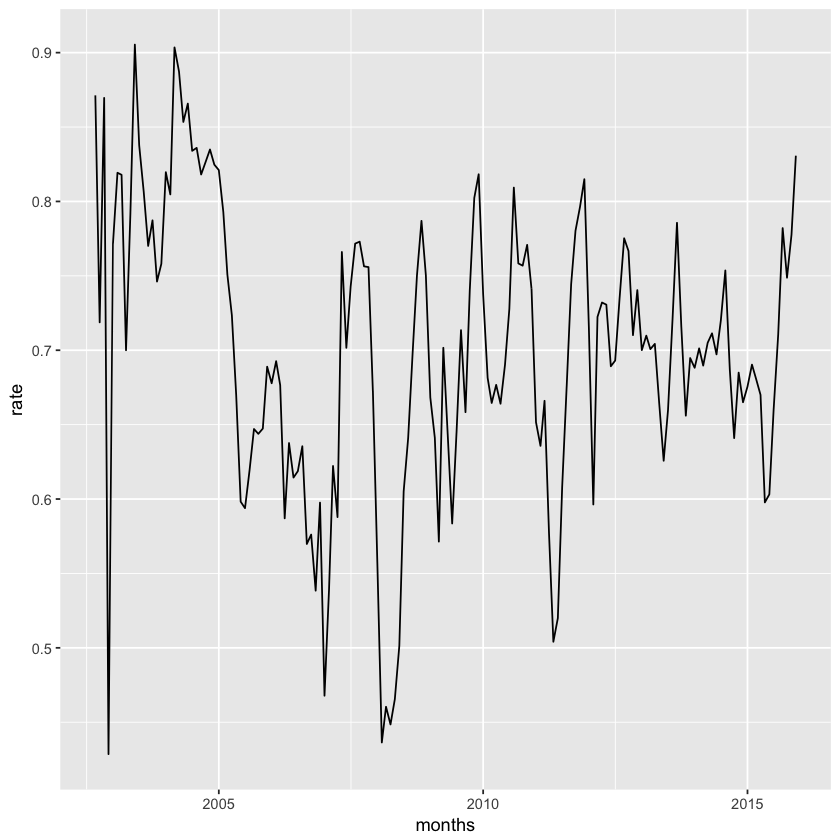

In [4]:
overall_rates %>% 
  ggplot(aes(months, rate)) +
  geom_line()

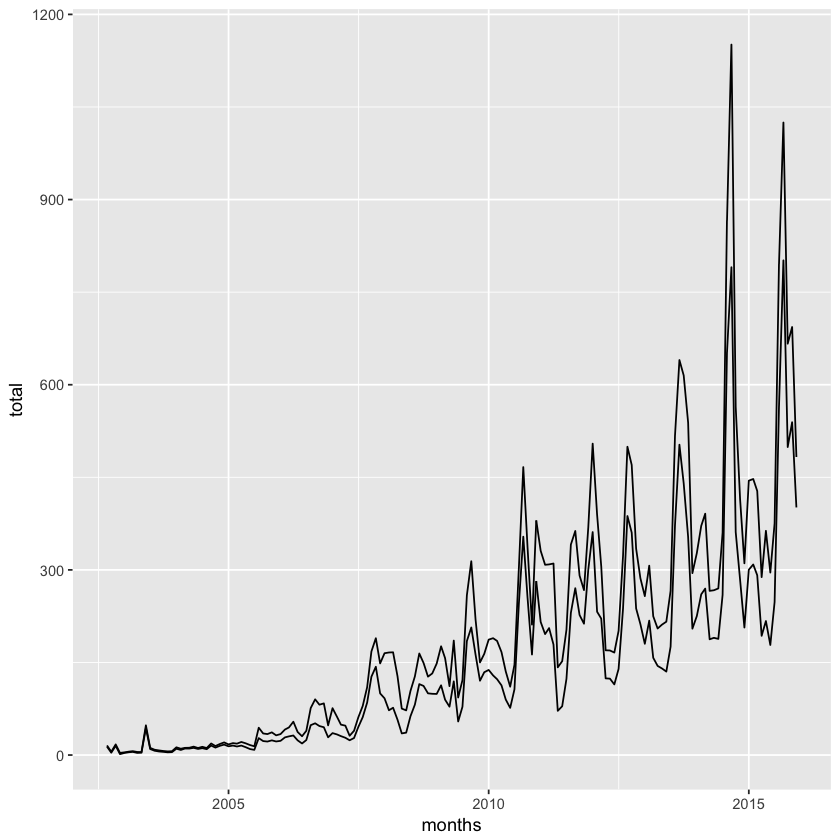

In [5]:
overall_rates %>% 
  ggplot() +
  geom_line(aes(months, total)) +
  geom_line(aes(months, completed))

We can see evidence of the financial crisis of 2008 in which the number of proposals spiked, but the fraction funded plumited.

## Poverty level and resource type

In [6]:
highest_poverty_rates <- projects_tbl %>%
  filter(date_posted < "2016-01-01")  %>% 
  filter(poverty_level == "highest poverty")  %>% 
  group_by(date_posted, funding_status) %>%
  count() %>%
  arrange(date_posted) %>%
  collect() %>%
  mutate(months = cut(date_posted, breaks = "month"))  %>% 
  mutate(months = as.POSIXct(months))  %>% 
  group_by(months, funding_status) %>%
  summarise(n_per_day = mean(n))  %>% 
  spread(funding_status, n_per_day)  %>% 
  mutate(
    total = completed + expired,
    rate = completed / (completed + expired)
  ) 

In [8]:
print(highest_poverty_rates)

Source: local data frame [160 x 6]
Groups: months [160]

# A tibble: 160 x 6
       months completed  expired reallocated     total      rate
       <dttm>     <dbl>    <dbl>       <dbl>     <dbl>     <dbl>
 1 2002-09-01 12.583333 2.000000          NA 14.583333 0.8628571
 2 2002-10-01  3.294118 1.500000          NA  4.794118 0.6871166
 3 2002-11-01 13.400000 2.250000          NA 15.650000 0.8562300
 4 2002-12-01  1.666667 1.000000          NA  2.666667 0.6250000
 5 2003-01-01  3.388889 1.000000          NA  4.388889 0.7721519
 6 2003-02-01  4.133333 1.000000          NA  5.133333 0.8051948
 7 2003-03-01  3.857143 1.250000          NA  5.107143 0.7552448
 8 2003-04-01  3.333333 1.500000          NA  4.833333 0.6896552
 9 2003-05-01  3.230769 1.000000          NA  4.230769 0.7636364
10 2003-06-01 42.428571 3.888889          NA 46.317460 0.9160384
# ... with 150 more rows


In [ ]:
print(highest_po)

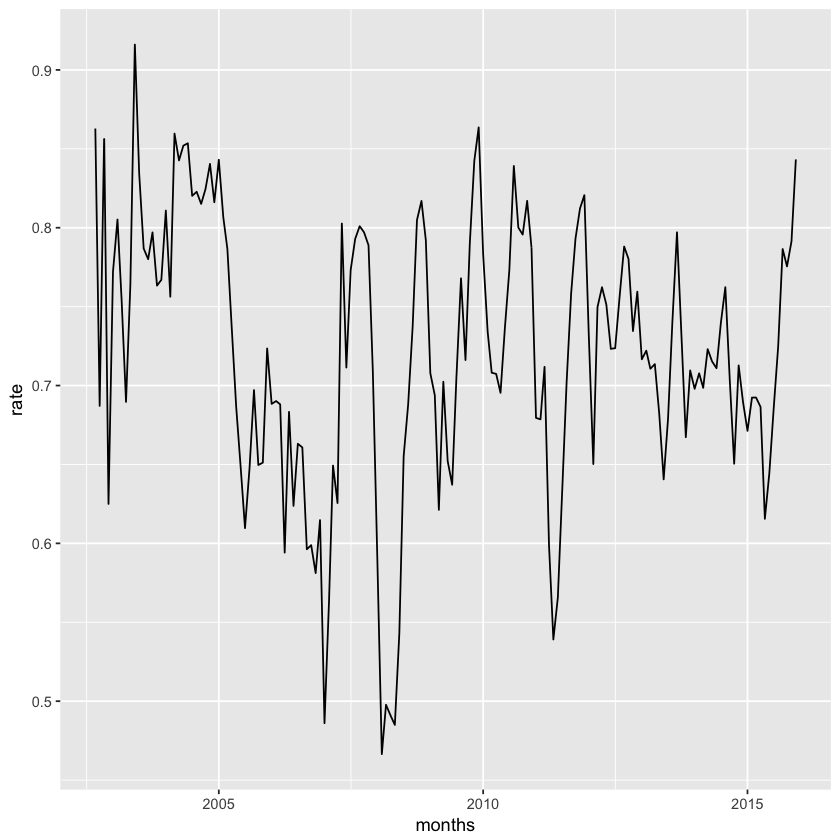

In [10]:
highest_poverty_rates %>% 
  ggplot(aes(months, rate)) +
  geom_line()

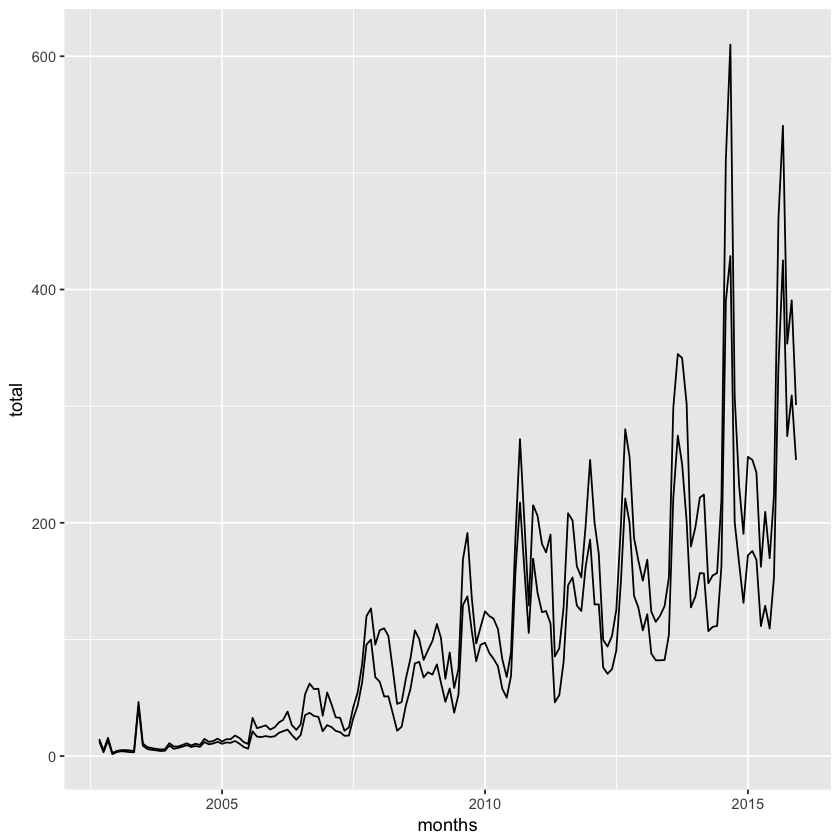

In [12]:
highest_poverty_rates %>% 
  ggplot() +
  geom_line(aes(months, total)) +
  geom_line(aes(months, completed))

## High  poverty rates for tech

In [15]:
poverty_tech_rates <- projects_tbl %>%
  filter(date_posted < "2016-01-01")  %>% 
  filter(poverty_level == "highest poverty")  %>% 
  filter(resource_type == "Technology")  %>% 
  group_by(date_posted, funding_status) %>%
  count() %>%
  arrange(date_posted) %>%
  collect() %>%
  mutate(months = cut(date_posted, breaks = "month"))  %>% 
  mutate(months = as.POSIXct(months))  %>% 
  group_by(months, funding_status) %>%
  summarise(n_per_day = mean(n))  %>% 
  spread(funding_status, n_per_day)  %>% 
  mutate(
    total = completed + expired,
    rate = completed / (completed + expired)
  ) 

Warning message:
“Removed 10 rows containing missing values (geom_path).”

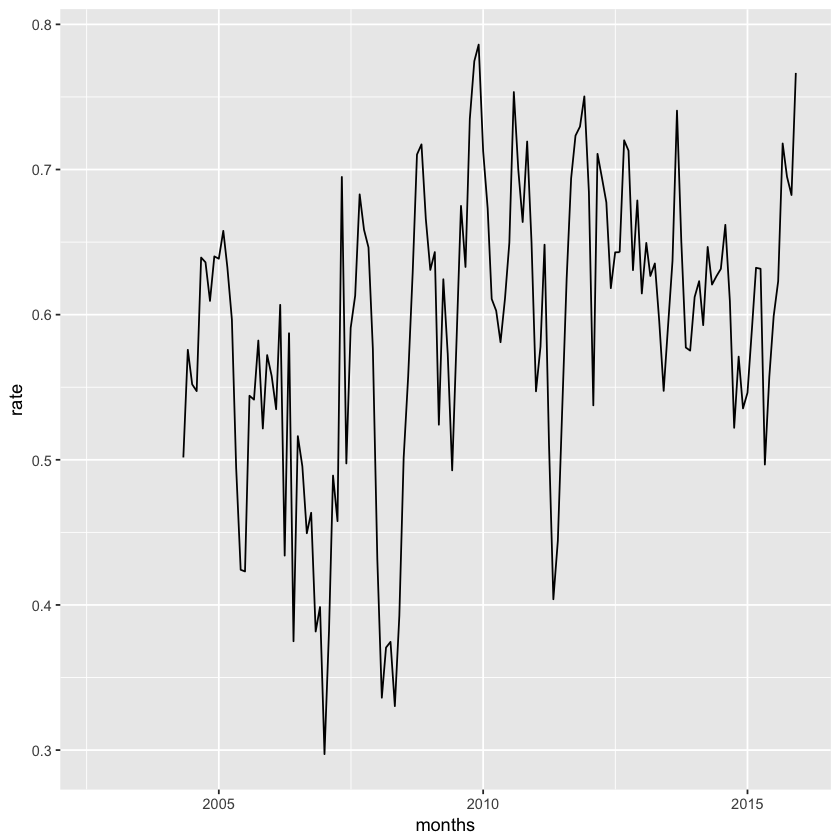

In [16]:
poverty_tech_rates %>% 
  ggplot(aes(months, rate)) +
  geom_line()

## Low Poverty rates for tech

In [18]:
poverty_tech_rates <- projects_tbl %>%
  filter(date_posted < "2016-01-01")  %>% 
  filter(poverty_level == "low poverty")  %>% 
  filter(resource_type == "Technology")  %>% 
  group_by(date_posted, funding_status) %>%
  count() %>%
  arrange(date_posted) %>%
  collect() %>%
  mutate(months = cut(date_posted, breaks = "month"))  %>% 
  mutate(months = as.POSIXct(months))  %>% 
  group_by(months, funding_status) %>%
  summarise(n_per_day = mean(n))  %>% 
  spread(funding_status, n_per_day)  %>% 
  mutate(
    total = completed + expired,
    rate = completed / (completed + expired)
  ) 

Warning message:
“Removed 16 rows containing missing values (geom_path).”

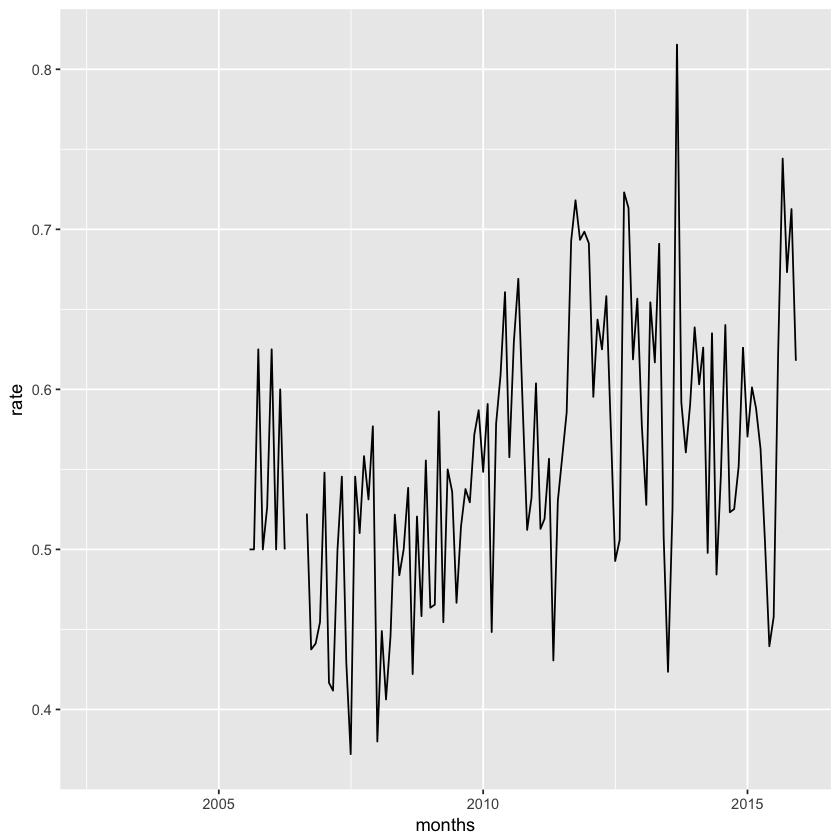

In [19]:
poverty_tech_rates %>% 
  ggplot(aes(months, rate)) +
  geom_line()